# Import

## Import library

In [1]:
import os
import sys
import warnings
from tqdm import tqdm_notebook as tqdm 

import numpy as np
import pandas as pd

# 데이터 전처리
import re
from konlpy.tag import Okt
from konlpy.tag import Mecab
import rhinoMorph
from collections import Counter

# 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# 현재 jupyter 위치를 PROJECT_DIR 추가
PROJECT_DIR = os.path.abspath(os.path.join(os.path.realpath('__file__'), '..'))
sys.path.insert(0, PROJECT_DIR)
DATA_DIR = PROJECT_DIR + '/data' # 데이터 위치 
print(DATA_DIR)

C:\Users\lime1\Documents\study\Python\project/data


## import

In [37]:
data_df = pd.read_excel(DATA_DIR +'/news_df_210205_v03_dna.xlsx')
data_df.head(2)

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             863 non-null    object
 1   date              863 non-null    object
 2   title             863 non-null    object
 3   article_original  863 non-null    object
 4   url               863 non-null    object
dtypes: object(5)
memory usage: 33.8+ KB


# 데이터 전처리

In [39]:
data_df['article_original'].iloc[0]

'2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\n 전 지구를 홀린 그룹입니다 \n \n\n 사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다. 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다. 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다. 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다. 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다.\n \n\n 한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다. BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다. 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다. 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다. 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다.\n \n\n BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다. 최정상급 가수들만 출연하는 유명 프로그램이다. 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다. BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다. 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다.\n \n\n BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노

기사 원문 데이터는 str 타입으로 개행문자(\n)를 포함하고 있습니다.  
이에 영문, 한글, 숫자를 제외한 불필요한 문자(\n ..)를 제거합니다.

In [40]:
# clearning
data_df['article_original'] = data_df['article_original'].apply(lambda x : re.sub(r'[^A-Za-z0-9가-힣 ]','',x))

In [41]:
data_df['article_original'][0]

'2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계  전 지구를 홀린 그룹입니다   사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다  한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다 BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다  BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다 최정상급 가수들만 출연하는 유명 프로그램이다 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다 BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다  BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노래가 흘러나왔고 행인들이 노래에 맞춰 몸을 흔들었다 새벽 1시부터 줄 서 기다렸다는 에블린

아래 토큰화 시 불용어를 삭제하기 위해 stop word를 파일을 불러옵니다.   
stop word 출처: https://www.ranks.nl/stopwords/korean  

In [3]:
stopwords = open(DATA_DIR+'/stopwords_kor.txt','r', encoding='utf-8').read().split('\n')
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

# 단어 토큰화

기사 원문에 대하여 4가지 방식으로 단어 토큰화를 진행하여 가장 결과가 좋은 것을 선택하고자 합니다.
- konlpy : Okt(morphs, nouns), Mecab(nouns)
- rhinoMorph

이와 동시에 불용어를 제거하며, 1글자 이하는 제거합니다.

In [9]:
# token test용 dataframe
token_df = data_df[['media','date','article_original']].copy()

In [10]:
okt = Okt()

In [11]:
# Okt.moprh 옵션에 따른 결과 확인
# - stem: 각 단어 어간 추출, norm : 문장정규화
text = token_df.article_original[0]
print('\n=== Okt.morph 비교 ===\n\n-- 원문 --\n', text)
okt_list = [okt.morphs(text), okt.morphs(text, stem=True), okt.morphs(text, norm=True)]
for i, list_ in enumerate(okt_list):
    word_list =  [word for word in list_ if word not in stopwords if len(word) >1]
    print('\n-- okt[',i,'] ---\n', word_list)


=== Okt.morph 비교 ===

-- 원문 --
 2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계  전 지구를 홀린 그룹입니다   사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다  한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다 BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다  BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다 최정상급 가수들만 출연하는 유명 프로그램이다 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다 BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다  BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노래가 흘러나왔고 행인들이 노래에 

위 3가지 결과를 비교하여 okt의 형태소(morph)단위 토큰화는 stem 옵션을 추가하여 어간을 추출한 경우를 적용하여 비교하기로 하였다.  
- vocab count 시 용이할 것으로 보임.

In [12]:
token_df['okt_morph'] = token_df.article_original.apply(lambda x : [w for w in okt.morphs(x, stem=True) if w not in stopwords if len(w) >1])
token_df.head(2)

,media,date,article_original,okt_morph
0,조선일보,2020-01-02,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,"[2012년, 싸이, 이다, 번째, ABC, 방송, 라이브, 생중계, 지구, 홀린,..."
1,조선일보,2020-01-02,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,"[방탄소년단, BTS, 미국, CNN, 선정, 2010년, 음악, 변화, 10, 대..."


In [13]:
token_df['okt_noun'] = token_df.article_original.apply(lambda x : [w for w in okt.nouns(x) if w not in stopwords if len(w) >1])
token_df.head(2)

,media,date,article_original,okt_morph,okt_noun
0,조선일보,2020-01-02,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,"[2012년, 싸이, 이다, 번째, ABC, 방송, 라이브, 생중계, 지구, 홀린,...","[싸이, 방송, 라이브, 생중계, 지구, 홀린, 그룹, 사회자, 소개, 방탄소년단,..."
1,조선일보,2020-01-02,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,"[방탄소년단, BTS, 미국, CNN, 선정, 2010년, 음악, 변화, 10, 대...","[방탄소년단, 미국, 선정, 음악, 변화, 아티스트, 선정, 현지, 음악, 장르, ..."


In [14]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
token_df['mecab_noun'] = token_df.article_original.apply(lambda x : [w for w in mecab.nouns(x) if w not in stopwords if len(w) >1])
token_df.head(2)

,media,date,article_original,okt_morph,okt_noun,mecab_noun
0,조선일보,2020-01-02,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,"[2012년, 싸이, 이다, 번째, ABC, 방송, 라이브, 생중계, 지구, 홀린,...","[싸이, 방송, 라이브, 생중계, 지구, 홀린, 그룹, 사회자, 소개, 방탄소년단,...","[싸이, 방송, 라이브, 중계, 지구, 그룹, 사회, 소개, 방탄소년단, 모습, 마..."
1,조선일보,2020-01-02,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,"[방탄소년단, BTS, 미국, CNN, 선정, 2010년, 음악, 변화, 10, 대...","[방탄소년단, 미국, 선정, 음악, 변화, 아티스트, 선정, 현지, 음악, 장르, ...","[방탄소년단, 미국, 선정, 음악, 변화, 아티스트, 선정, 현지, 음악, 장르, ..."


In [15]:
# # None drop, date 순 정렬 파일저장
# token_df.to_excel(DATA_DIR+'/token_ver1.xlsx', index=False)

In [4]:
# ## konlpy와 rhino가 한 코드 내에서 실행하면 충돌하는 것 같음
# # konlpy 실행 후 rhino 실행하면 에러나므로 위에서 저장하고 다시 불러와서 새로 실행함
# token_df = pd.read_excel(DATA_DIR+'/token_ver1.xlsx')
# token_df.head(2)

,media,date,article_original,okt_morph,okt_noun,mecab_noun
0,조선일보,2020-01-02,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,"['2012년', '싸이', '이다', '번째', 'ABC', '방송', '라이브'...","['싸이', '방송', '라이브', '생중계', '지구', '홀린', '그룹', '...","['싸이', '방송', '라이브', '중계', '지구', '그룹', '사회', '소..."
1,조선일보,2020-01-02,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,"['방탄소년단', 'BTS', '미국', 'CNN', '선정', '2010년', '...","['방탄소년단', '미국', '선정', '음악', '변화', '아티스트', '선정'...","['방탄소년단', '미국', '선정', '음악', '변화', '아티스트', '선정'..."


In [25]:
# # 실질형태소, 어말어미(emoi) 제외, NNG+NNP, XR+하: 동사로 변형(xrVv) 안함
# # 품사정보: https://m.blog.naver.com/lingua/220143966152
# # NNG: 일반명사 / NNP: 고유명사 / (VV: 동사) / VA: 형용사 
# # (XR: 어근 / IC: 감탄사 / MM: 관형사 / MAG: 일반부사 / MAJ: 접속부사)
# rhino = rhinoMorph.startRhino()
# token_df['rhino'] = token_df.article_original.apply(lambda x: rhinoMorph.onlyMorph_list(rhino, x, pos=['NNG','NNP','VA'], combineN=True)) # eomi=True, xrVv=True))
# token_df.rhino = token_df.rhino.apply(lambda x : [w for w in x if x not in stopwords if len(w) >1])  # 불용어 제거
# token_df.head(2)

filepath:  C:\Users\lime1\anaconda3\Lib\site-packages
classpath:  C:\Users\lime1\anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


,media,date,article_original,okt_morph,okt_noun,mecab_noun,rhino
0,조선일보,2020-01-02,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,"['2012년', '싸이', '이다', '번째', 'ABC', '방송', '라이브'...","['싸이', '방송', '라이브', '생중계', '지구', '홀린', '그룹', '...","['싸이', '방송', '라이브', '중계', '지구', '그룹', '사회', '소...","[방송, 라이브, 생중계, 지구, 그룹, 사회자, 소개, 방탄소년단, 모습, 마지막..."
1,조선일보,2020-01-02,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,"['방탄소년단', 'BTS', '미국', 'CNN', '선정', '2010년', '...","['방탄소년단', '미국', '선정', '음악', '변화', '아티스트', '선정'...","['방탄소년단', '미국', '선정', '음악', '변화', '아티스트', '선정'...","[방탄소년단, 미국, 선정, 음악, 변화, 아티스트, 현지시각, 자신, 음악, 장르..."


In [26]:
# for token_name in token_df.columns.tolist()[2:]:
#     print('\n-- ',token_name,' --\n', token_df[token_name][0])


--  article_original  --
 2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계  전 지구를 홀린 그룹입니다   사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다  한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다 BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다  BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다 최정상급 가수들만 출연하는 유명 프로그램이다 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다 BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다  BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노래가 흘러나왔고 행인들이 노래에 맞춰 몸을 

# 단어 분포 확인

In [19]:
token_list = token_df.columns.tolist()[3:]
token_list

['okt_morph', 'okt_noun', 'mecab_noun']

In [20]:
vocab_cnt = []
vocab_most50 = []
for token_name in token_list:
    words_list = [word for sent in token_df[token_name] for word in sent]
    print(words_list[:20])
    vocab = Counter(words_list)
    vocab_cnt.append(vocab)
    vocab_most50.append(vocab.most_common(50))

['2012년', '싸이', '이다', '번째', 'ABC', '방송', '라이브', '생중계', '지구', '홀린', '그룹', '이다', '사회자', '소개', '방탄소년단', 'BTS', '모습', '드러내다', '2019년', '마지막']
['싸이', '방송', '라이브', '생중계', '지구', '홀린', '그룹', '사회자', '소개', '방탄소년단', '모습', '마지막', '미국', '뉴욕', '맨해튼', '타임스스퀘어', '무대', '현지', '저녁', '타임스스퀘어']
['싸이', '방송', '라이브', '중계', '지구', '그룹', '사회', '소개', '방탄소년단', '모습', '마지막', '미국', '뉴욕', '맨해튼', '타임스스퀘어', '무대', '현지', '저녁', '타임스', '스퀘어']


In [21]:
vocab_most50_df = pd.DataFrame(vocab_most50).T
vocab_most50_df.rename(columns= {i:t for i,t in enumerate(token_list)}, inplace=True)

In [22]:
vocab_most50_df.head(50)

,okt_morph,okt_noun,mecab_noun
0,"(하다, 13597)","(방탄소년단, 2859)","(방탄소년단, 2827)"
1,"(이다, 3017)","(미국, 1475)","(미국, 1475)"
2,"(되다, 2871)","(빌보드, 1343)","(차트, 1354)"
3,"(방탄소년단, 2859)","(한국, 1228)","(빌보드, 1341)"
4,"(BTS, 2744)","(차트, 1220)","(한국, 1232)"
5,"(미국, 1475)","(중국, 1120)","(앨범, 1167)"
6,"(빌보드, 1343)","(앨범, 1080)","(중국, 1146)"
7,"(돼다, 1241)","(세계, 1015)","(세계, 1079)"
8,"(한국, 1228)","(빅히트, 896)","(히트, 959)"
9,"(차트, 1220)","(기록, 874)","(기록, 880)"


In [23]:
vocab_most50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   okt_morph   50 non-null     object
 1   okt_noun    50 non-null     object
 2   mecab_noun  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [27]:
# # rhino
# words_list = [word for sent in token_df['rhino'] for word in sent]
# print(words_list[:20])
# vocab = Counter(words_list)
# # vocab.most_common(50)

['방송', '라이브', '생중계', '지구', '그룹', '사회자', '소개', '방탄소년단', '모습', '마지막', '미국', '뉴욕', '맨해튼', '타임스스퀘어', '무대', '현지', '시각', '저녁', '타임스스퀘어', '드롭']


In [33]:
# rhino
vocab_most50_df = pd.DataFrame(vocab.most_common(100), columns=['vocab','count'])
vocab_most50_df[:50]

,vocab,count
0,방탄소년단,2852
1,미국,1422
2,빌보드,1330
3,차트,1184
4,중국,1070
5,앨범,1058
6,한국,920
7,세계,807
8,그룹,721
9,코로나,651


In [34]:
vocab_most50_df[50:] # rhino

,vocab,count
50,온라인,268
51,지난달,265
52,시간,262
53,뮤직비디오,262
54,시장,259
55,최초,257
56,최근,256
57,발표,252
58,대표,251
59,역사,250


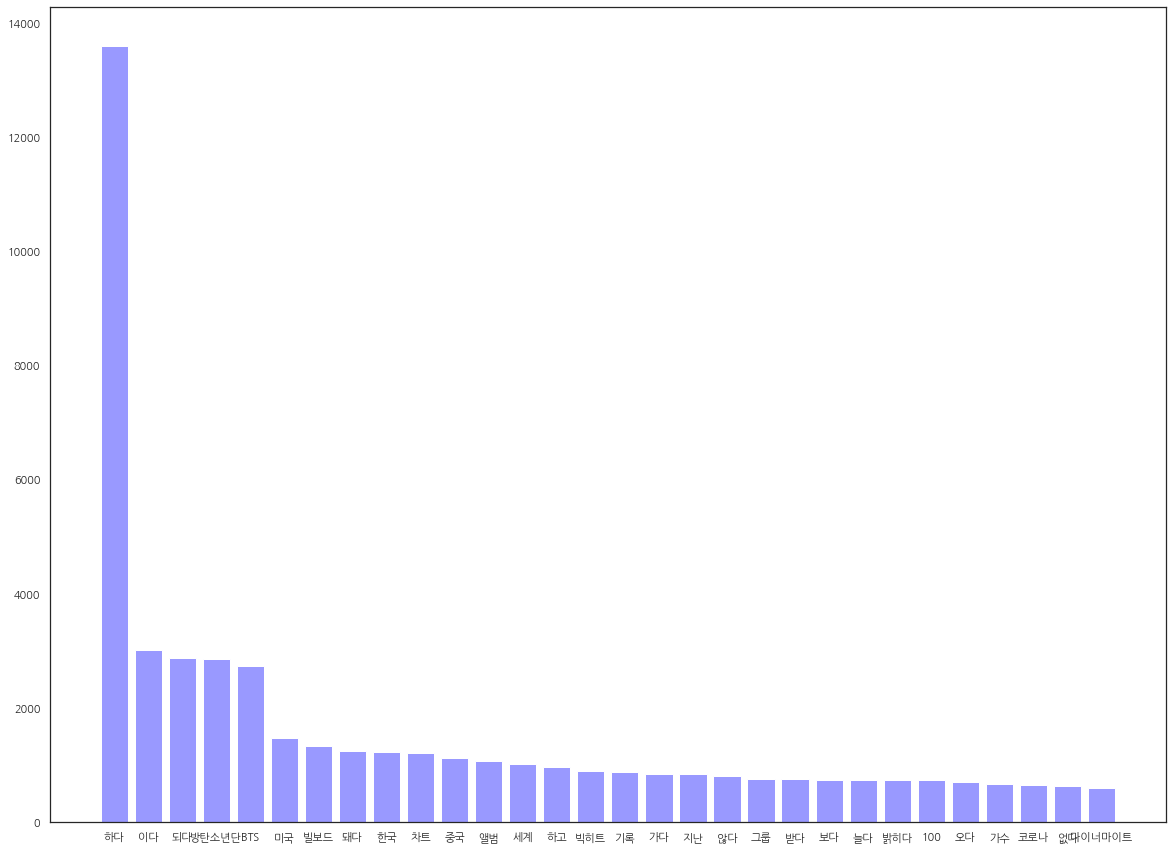

In [26]:
## okt morph ----
sorted_mkeys = vocab_most50_df['okt_morph'].apply(lambda x : x[0]).tolist()
sorted_mvalues = vocab_most50_df['okt_morph'].apply(lambda x : x[1]).tolist()

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumGothic') 
plt.bar(range(30), sorted_mvalues[:30], color='#9999ff')
plt.xticks(range(30), sorted_mkeys[:30])
plt.show()

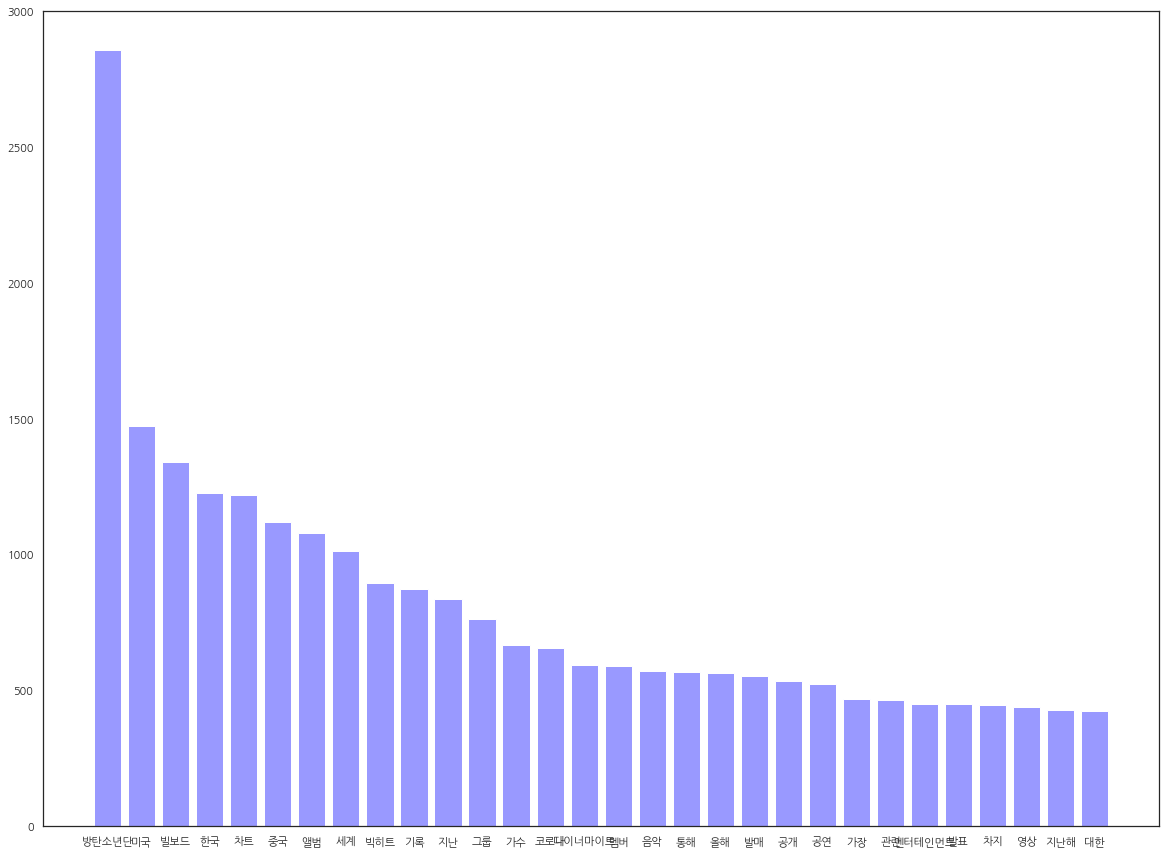

In [27]:
## okt noun ----
sorted_mkeys = vocab_most50_df['okt_noun'].apply(lambda x : x[0]).tolist()
sorted_mvalues = vocab_most50_df['okt_noun'].apply(lambda x : x[1]).tolist()

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumGothic') 
plt.bar(range(30), sorted_mvalues[:30], color='#9999ff')
plt.xticks(range(30), sorted_mkeys[:30])
plt.show()

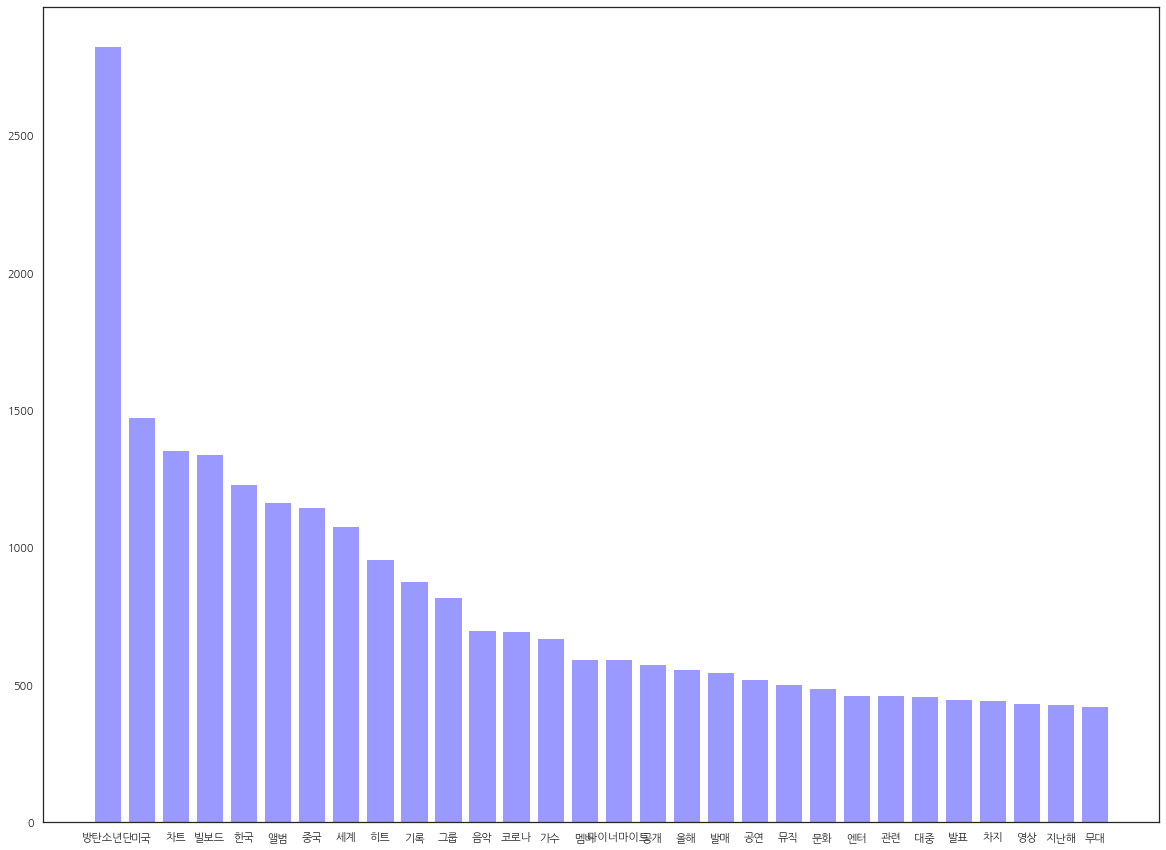

In [28]:
## mecab noun ----
sorted_mkeys = vocab_most50_df['mecab_noun'].apply(lambda x : x[0]).tolist()
sorted_mvalues = vocab_most50_df['mecab_noun'].apply(lambda x : x[1]).tolist()

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumGothic') 
plt.bar(range(30), sorted_mvalues[:30], color='#9999ff')
plt.xticks(range(30), sorted_mkeys[:30])
plt.show()

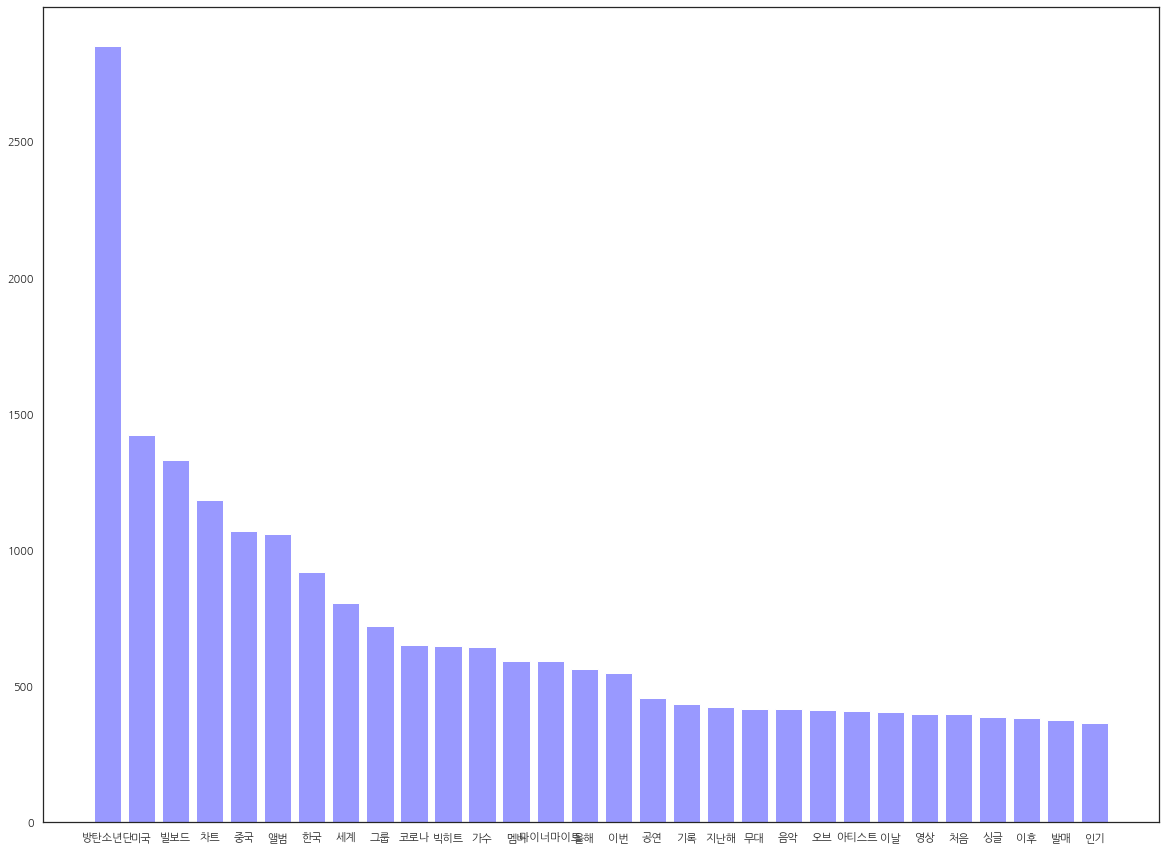

In [35]:
# rhinoMorph ----
sorted_keys = vocab_most50_df['vocab'][:50]
sorted_values = vocab_most50_df['count'][:50]

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumGothic') 
plt.bar(range(30), sorted_values[:30], color='#9999ff')
plt.xticks(range(30), sorted_keys[:30])
plt.show()

위에서 rhinoMorph와 konlpy 패키지로 4가지 경우의 대하여 토큰화 결과를 통해 문서 내 단어 개수를 확인하였다.  
    - 1) Okt 모듈의 morphs 메소드의 어간 추출(stemmer)  
    - 2) Okt 모듈의 nouns 메소드
    - 3) Mecab 모듈의 nouns 메소드  
    - 4) rhinoMorph 실질형태소 추출  (NNG: 일반명사 / NNP: 고유명사 / VA: 형용사)
    
1)의 경우, 불용어가 많이 포함되어 있어 향후 분석 시 노이즈 현상이 많이 나타날 것으로 생각되었다.  
2)와 3), 4)의 경우 명사 중심 토큰화이기에 기사의 내용을 명확히 보여줄 것으로 생각되었다.  
<br></br>
단어 수 50위 내 결과로, 2)와 3)의 경우를 비교하면 2)에는 '엔터테인먼트'라는 단어가 있고, 3)에는 없으며, '병역'이라는 단어는 2)에는 없고, 3)에는 있었다.   
하지만 전체적으로 단어를 살펴보면 rhinoMorph가 고유명사를 포함하여 보다 명확하게 토큰화를 해주고 있는 것으로 보인다.   
(Mecab에서는 '빅히트'라는 소속사 명을 '히트'로 보고 카운트하고 있다. 그리고 '빅히트엔터테인먼트'라는 정확한 고유명사를 가지고 확인하고 있다.)

*** rhinoMorph 패키지를 최종적으로 적용하여 사용하기로 하였다. ***  

In [43]:
data_df['token_rhino'] = token_df['rhino'].copy()
data_df.head(2)

,media,date,title,article_original,url,token_rhino
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방송, 라이브, 생중계, 지구, 그룹, 사회자, 소개, 방탄소년단, 모습, 마지막..."
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방탄소년단, 미국, 선정, 음악, 변화, 아티스트, 현지시각, 자신, 음악, 장르..."


In [44]:
# None drop, date 순 정렬 파일저장
data_df.to_excel(DATA_DIR+'/news_df_210205_v03_token.xlsx', index=False)